# Importing packages for the visualization

In [121]:
%matplotlib inline
import cartopy
import pandas as pd
import matplotlib.pyplot as plt
import geopandas 
import ipyleaflet
import numpy as np
import bqplot
import contextily as ctx

In [122]:
import geopandas as gpd
chicago_parks = gpd.read_file('/Users/bhavyabonam/Desktop/Chicago_parks.geojson') #link to the data: https://data.cityofchicago.org/Parks-Recreation/Parks-Chicago-Park-District-Park-Boundaries-curren/ej32-qgdr
print(chicago_parks.head())#for general idea about the data

  pool_outdo golf_cours community baseball_b wheelchr_a  acres bocce_cour  \
0          0          0         1          0          0   10.3          3   
1          1          0         0          0          0   9.05          0   
2          1          0         0          0          0  11.31          0   
3          1          0         0          0          0    8.8          0   
4          1          0         0          0          0  10.05          0   

  sled_hill artificial     shape_area  ... volleyba_1 iceskating park_no  \
0         0          0  430341.671424  ...          0          0       2   
1         0          0  391095.834054  ...          1          0       3   
2         0          0  497076.662367  ...          0          0       4   
3         0          1  385672.402254  ...          0          0       5   
4         0          0  435169.113288  ...          0          0       6   

  climbing_w boat_launc beach volleyball zoo minigolf  \
0          0          0

In [123]:
chicago_parks.head()


pool_outdo golf_cours community baseball_b wheelchr_a  acres bocce_cour  \
0          0          0         1          0          0   10.3          3   
1          1          0         0          0          0   9.05          0   
2          1          0         0          0          0  11.31          0   
3          1          0         0          0          0    8.8          0   
4          1          0         0          0          0  10.05          0   

  sled_hill artificial     shape_area  ... volleyba_1 iceskating park_no  \
0         0          0  430341.671424  ...          0          0       2   
1         0          0  391095.834054  ...          1          0       3   
2         0          0  497076.662367  ...          0          0       4   
3         0          1  385672.402254  ...          0          0       5   
4         0          0  435169.113288  ...          0          0       6   

  climbing_w boat_launc beach volleyball zoo minigolf  \
0          0          0     0          0   0        0   
1          0          0     0          1   0        0   
2          0          0     0          0   0        0   
3          0          0     0          0   0        0   
4          0          0     0          2   0        0   

                                            geometry  
0  MULTIPOLYGON (((-87.64818 41.83973, -87.64820 ...  
1  MULTIPOLYGON (((-87.63286 41.83450, -87.63285 ...  
2  MULTIPOLYGON (((-87.63555 41.81258, -87.63529 ...  
3  MULTIPOLYGON (((-87.66976 41.80301, -87.66976 ...  
4  MULTIPOLYGON (((-87.54799 41.74462, -87.54796 ...  

[5 rows x 81 columns]

# Changing a few names for better naming convention and understanding 

In [124]:
chicago_parks.rename(columns = {'pool_outdo':'outdoor_pool'}, inplace = True) 
chicago_parks.rename(columns = {'golf_cours':'golf_course'}, inplace = True) 
chicago_parks.rename(columns = {'wheelchr_a':'wheelchair_access'}, inplace = True) 
chicago_parks.rename(columns = {'bocce_cour':'bocce_court'}, inplace = True) 
chicago_parks.rename(columns = {'volleyba_1':'volleyball'}, inplace = True)  

chicago_parks.drop(['bocce_court', 'volleyball'], axis=1, inplace=True) #deleting unwanted columns


chicago_parks



outdoor_pool golf_course community baseball_b wheelchair_access  acres  \
0              0           0         1          0                 0   10.3   
1              1           0         0          0                 0   9.05   
2              1           0         0          0                 0  11.31   
3              1           0         0          0                 0    8.8   
4              1           0         0          0                 0  10.05   
..           ...         ...       ...        ...               ...    ...   
609            0           0         0          0                 0   0.28   
610            0           0         0          0                 0   0.28   
611            0           0         0          0                 0   17.6   
612            0           0         0          0                 0     12   
613            0           0         0          0                 0   3.89   

    sled_hill artificial     shape_area               location  ...  \
0           0          0  430341.671424      2901 S POPLAR AVE  ...   
1           0          0  391095.834054     3309 S SHIELDS AVE  ...   
2           0          0  497076.662367          331 W 45TH ST  ...   
3           0          1  385672.402254         1809 W 50TH ST  ...   
4           0          0  435169.113288         3045 E 83RD ST  ...   
..        ...        ...            ...                    ...  ...   
609         0          0   12124.046199     4546 N KEDVALE AVE  ...   
610         0          0  12011.5971999   3906 S LAKE PARK AVE  ...   
611         0          0   771014.72199  4826-40 S WESTERN AVE  ...   
612         0          0  537682.135164   12500 S TORRENCE AVE  ...   
613         0          0  170469.453426     1514 N LARRABEE ST  ...   

    basketba_1            park_class iceskating park_no climbing_w boat_launc  \
0            1        COMMUNITY PARK          0       2          0          0   
1            0        COMMUNITY PARK          0       3          0          0   
2            1        COMMUNITY PARK          0       4          0          0   
3            2        COMMUNITY PARK          0       5          0          0   
4            1        COMMUNITY PARK          0       6          0          0   
..         ...                   ...        ...     ...        ...        ...   
609          0       UNIMPROVED PARK          0     593          0          0   
610          0       UNIMPROVED PARK          0     591          0          0   
611          0       UNIMPROVED PARK          0     596          0          0   
612          0  NATURE PRESERVE PARK          0     597          0          0   
613          0       UNIMPROVED PARK          0     598          0          0   

    beach zoo minigolf                                           geometry  
0       0   0        0  MULTIPOLYGON (((-87.64818 41.83973, -87.64820 ...  
1       0   0        0  MULTIPOLYGON (((-87.63286 41.83450, -87.63285 ...  
2       0   0        0  MULTIPOLYGON (((-87.63555 41.81258, -87.63529 ...  
3       0   0        0  MULTIPOLYGON (((-87.66976 41.80301, -87.66976 ...  
4       0   0        0  MULTIPOLYGON (((-87.54799 41.74462, -87.54796 ...  
..    ...  ..      ...                                                ...  
609     0   0        0  MULTIPOLYGON (((-87.73227 41.96401, -87.73168 ...  
610     0   0        0  MULTIPOLYGON (((-87.60428 41.82460, -87.60388 ...  
611     0   0        0  MULTIPOLYGON (((-87.68915 41.80645, -87.68671 ...  
612     0   0        0  MULTIPOLYGON (((-87.56246 41.66837, -87.56260 ...  
613     0   0        0  MULTIPOLYGON (((-87.64526 41.91023, -87.64353 ...  

[614 rows x 78 columns]

# About the Data

I took the dataset from the city of Chicago website, the data is a GeoJSON file that I downloaded from their website. The data consists of parks in Chicago and their boundaries Each column in the dataset describes the facility the park provides like wheelchair access, tennis court, an outdoor pool, golfcourse and the number 0 and 1 represent yes or not. So if a particular park has a tennis court it says 1 or 0 if not, below I changed to true or false instead of 1 or 0 since it will look better in a visual instead of just 0 or 1.

In [125]:
chicago_parks['wheelchair_access'] = chicago_parks['wheelchair_access'].map( 
                   {'1':True ,'0':False}) 

chicago_parks['zoo'] = chicago_parks['zoo'].map( 
                   {'1':True ,'0':False}) 

chicago_parks['golf_course'] = chicago_parks['golf_course'].map( 
                   {'1':True ,'0':False}) 

# Creating a simple plot so we know how it looks

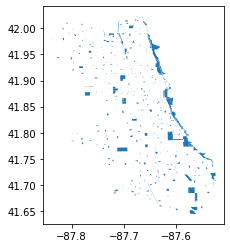

In [126]:
chicago_parks.plot()


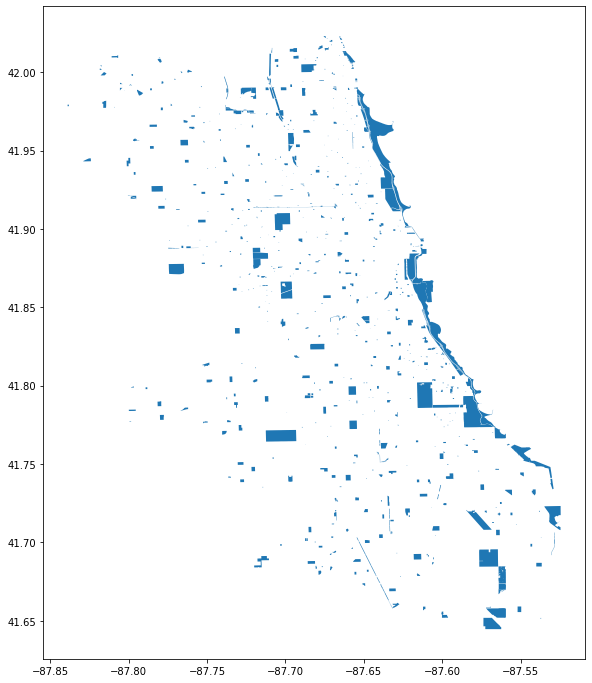

In [127]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(12,12))#zoom in a bit

chicago_parks.plot(ax=ax)

plt.show() #using matplotlib

# These are the boundaries of the parks in Chicago. 




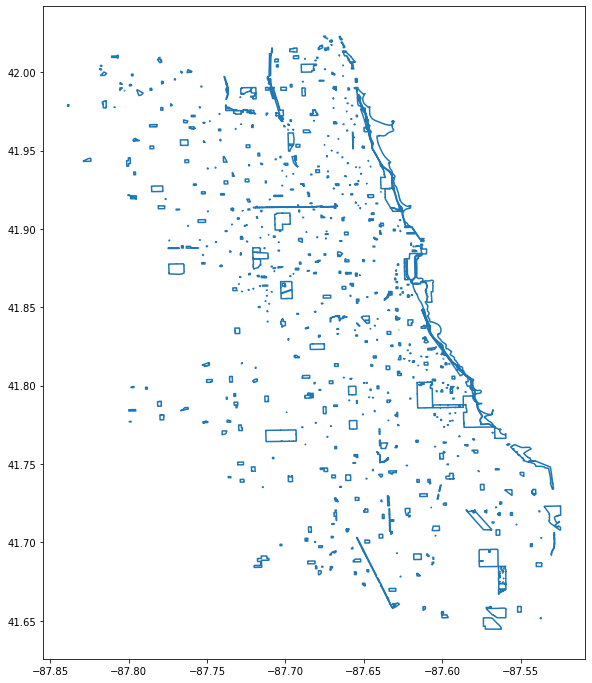

In [128]:
fig, ax = plt.subplots(figsize=(12,12))#zoom in a bit

chicago_parks.boundary.plot(ax=ax)

plt.show()

In [129]:
chicago_parks.crs

{'init': 'epsg:4326'}

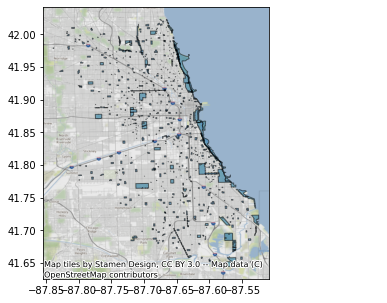

In [130]:
import contextily as ctx
fig, ax = plt.subplots(figsize=(5,5))#plotting the figure

chicago_parks.plot(ax=ax, alpha = 0.5, edgecolor = 'black')#adding alpha for little transperancy
ctx.add_basemap(ax=ax,crs=chicago_parks.crs)

plt.show()

# Another Dataset for layering 

The dataset is taken from city of Chicago from the same place we took our first dataset, this data consists of neighbourhood boundaries in Chicago. The dataset has columns like promary neighbourhood and secondary neighborhood the latitude and longitude as well.

In [131]:
import geopandas as gpd
chicago_boundaries = gpd.read_file('/Users/bhavyabonam/Desktop/Chicago_boundaries.geojson')

chicago_boundaries

pri_neigh               sec_neigh     shape_area     shape_len  \
0      Grand Boulevard             BRONZEVILLE  48492503.1554  28196.837157   
1         Printers Row            PRINTERS ROW  2162137.97139   6864.247156   
2        United Center           UNITED CENTER  32520512.7053  23101.363745   
3   Sheffield & DePaul      SHEFFIELD & DEPAUL  10482592.2987  13227.049745   
4        Humboldt Park           HUMBOLDT PARK  125010425.593  46126.751351   
..                 ...                     ...            ...           ...   
93      Belmont Cragin  BELMONT CRAGIN,HERMOSA  109099407.211  43311.706886   
94              Austin                  AUSTIN  170037750.826  55473.345911   
95          Gold Coast              GOLD COAST  7165705.53467  13685.479377   
96            Boystown                BOYSTOWN  3365778.97115   9780.268985   
97         River North             RIVER NORTH  38766442.5194   31506.03781   

                                             geometry  
0   MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ...  
1   MULTIPOLYGON (((-87.62761 41.87437, -87.62760 ...  
2   MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ...  
3   MULTIPOLYGON (((-87.65833 41.92166, -87.65835 ...  
4   MULTIPOLYGON (((-87.74060 41.88782, -87.74060 ...  
..                                                ...  
93  MULTIPOLYGON (((-87.74143 41.91698, -87.74141 ...  
94  MULTIPOLYGON (((-87.75620 41.91547, -87.75588 ...  
95  MULTIPOLYGON (((-87.62646 41.91147, -87.62640 ...  
96  MULTIPOLYGON (((-87.64878 41.93999, -87.64927 ...  
97  MULTIPOLYGON (((-87.63145 41.90390, -87.63144 ...  

[98 rows x 5 columns]

# Plotting a fiugure of the second dataset to see how it looks

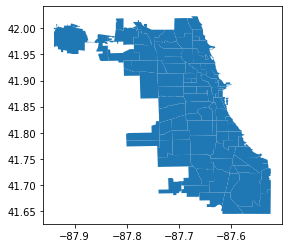

In [132]:
chicago_boundaries.plot()

In [133]:
chicago_boundaries.crs

{'init': 'epsg:4326'}

 # Next we are going to plot two layers the boundaries of the neighbourhood in Chicago and the parks in Chicago. The brown being the parks and the boundaries is shown in blue

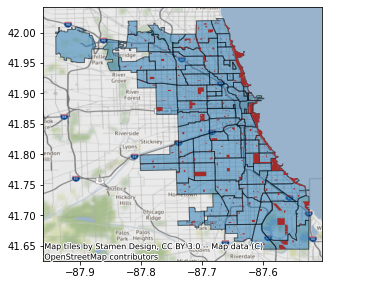

In [134]:
fig, ax = plt.subplots(figsize=(5,5))


chicago_boundaries.plot(ax=ax, alpha = 0.5, edgecolor = 'black')
chicago_parks.plot(ax=ax, color='brown')
ctx.add_basemap(ax=ax,crs=chicago_boundaries.crs)


plt.show()

# Now I will plot few columns like park class which means the type of park it is whether community or citywide and so on and if these parks has a zoo, a golfcourse or a wheelchair access, from the dataset consists of parks in Chicago and perform data cleaning or replacing missing value if any.

In [135]:
chicago_parks['park_class'].unique()

# There are no missing or null values so I am \ good to go

array(['COMMUNITY PARK', 'REGIONAL PARK', 'CITYWIDE PARK',
       'UNIMPROVED PARK', 'MAGNET PARK', 'PASSIVE PARK', 'MINI-PARK',
       'NEIGHBORHOOD PARK', 'PARKWAY PARK', 'LINEAR PARK',
       'NATURE PRESERVE PARK', 'PARKWAYS PARK'], dtype=object)

In [136]:
chicago_parks['wheelchair_access'].unique()

array([False,  True])

In [137]:
chicago_parks['zoo'].unique()

array([False,  True])

In [138]:
chicago_parks['golf_course'].unique()

array([False,  True])

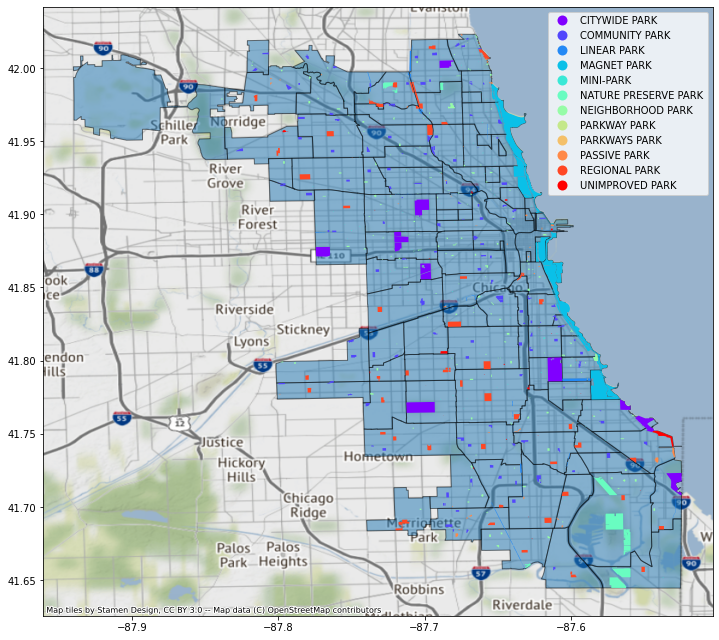

In [139]:
fig, ax = plt.subplots(figsize=(12,12))

chicago_boundaries.plot(ax=ax, alpha = 0.5, edgecolor = 'black')
chicago_parks.plot(column='park_class',ax=ax, cmap='rainbow', categorical=True, legend=True)#plotting park class with a legend 
ctx.add_basemap(ax=ax,crs=chicago_boundaries.crs)

plt.show()

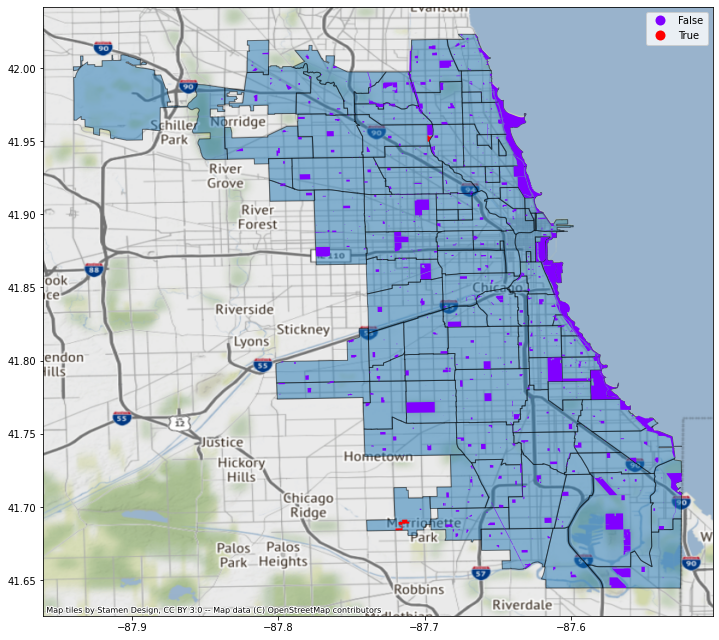

In [140]:
fig, ax = plt.subplots(figsize=(12,12))

chicago_boundaries.plot(ax=ax, alpha = 0.5, edgecolor = 'black')
chicago_parks.plot(column='wheelchair_access',ax=ax, cmap='rainbow', categorical=True, legend=True)#plotting wheelchair access as a yes or a no
ctx.add_basemap(ax=ax,crs=chicago_boundaries.crs)

plt.show()

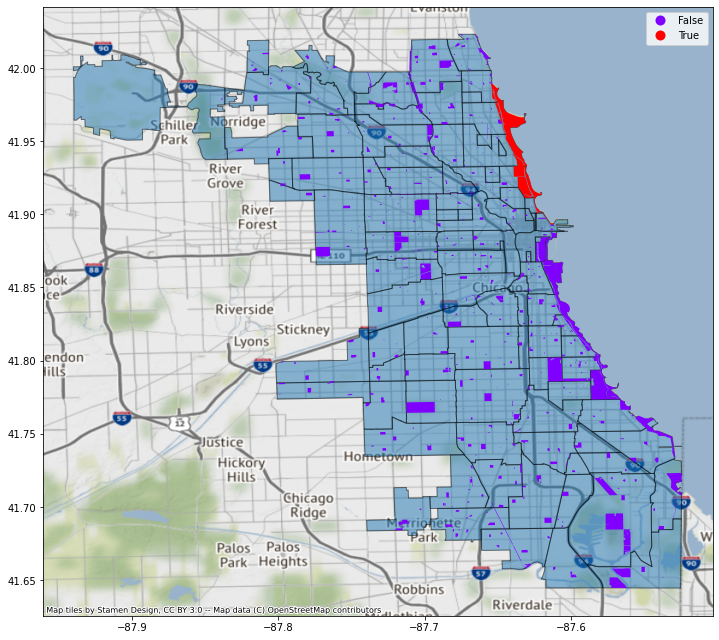

In [141]:
fig, ax = plt.subplots(figsize=(12,12))

chicago_boundaries.plot(ax=ax, alpha = 0.5, edgecolor = 'black')
chicago_parks.plot(column='zoo',ax=ax, cmap='rainbow', categorical=True, legend=True)# plotting if there is any zoo in the park as a yes or a no
ctx.add_basemap(ax=ax,crs=chicago_boundaries.crs)

plt.show()

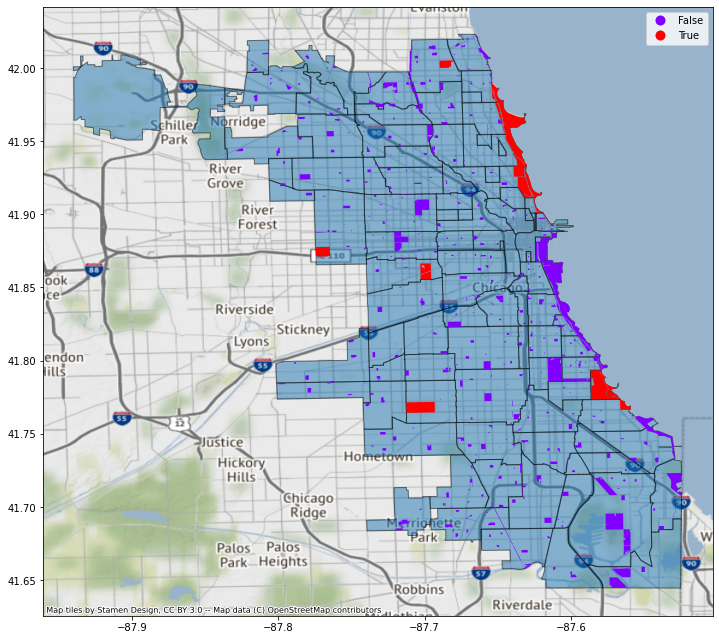

In [142]:
fig, ax = plt.subplots(figsize=(12,12))

chicago_boundaries.plot(ax=ax, alpha = 0.5, edgecolor = 'black')
chicago_parks.plot(column='golf_course',ax=ax, cmap='rainbow', categorical=True, legend=True)# plotting if there are ahy golfcourse in the park as yes or a no
ctx.add_basemap(ax=ax,crs=chicago_boundaries.crs)

plt.show()

In [143]:
import ipywidgets

# I am going to make the map interactive using ipywidgets

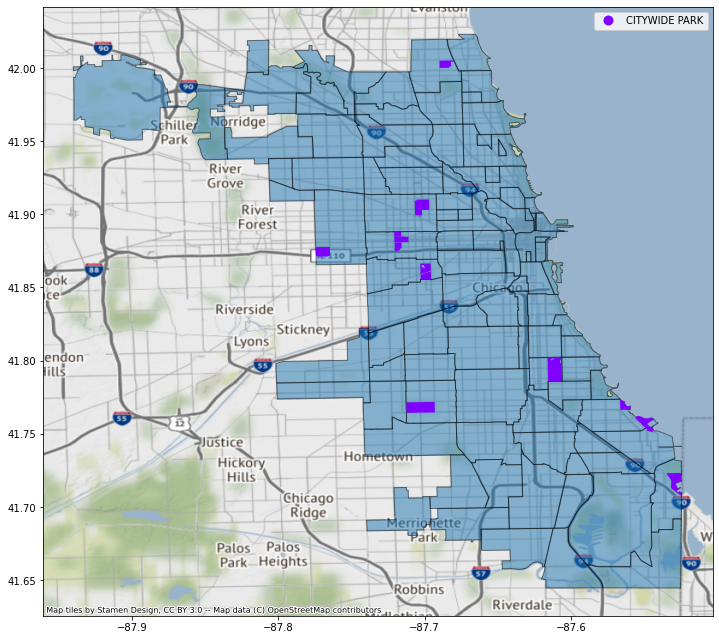

In [144]:
p_type = 'CITYWIDE PARK' #here we are choosing  from park_class the CITYWIDE PARK to hardcore

chicago_parks_subs = chicago_parks.loc[chicago_parks['park_class'] == p_type]#making a subset
fig, ax = plt.subplots(figsize=(12,12))

chicago_boundaries.plot(ax=ax, alpha = 0.5, edgecolor = 'black')
chicago_parks_subs.plot(column='park_class',ax=ax, cmap='rainbow', categorical=True, legend=True)
ctx.add_basemap(ax=ax,crs=chicago_boundaries.crs)

plt.show()

# Creating a function and try out other parks as well

In [145]:
def parks_plot(p_type): #creating a function 
    chicago_parks_subs = chicago_parks.loc[chicago_parks['park_class'] == p_type]
    fig, ax = plt.subplots(figsize=(12,12))

    chicago_boundaries.plot(ax=ax, alpha = 0.5, edgecolor = 'black')
    chicago_parks_subs.plot(column='park_class',ax=ax, cmap='rainbow', categorical=True, legend=True)
    ctx.add_basemap(ax=ax,crs=chicago_boundaries.crs)

    plt.show()
   

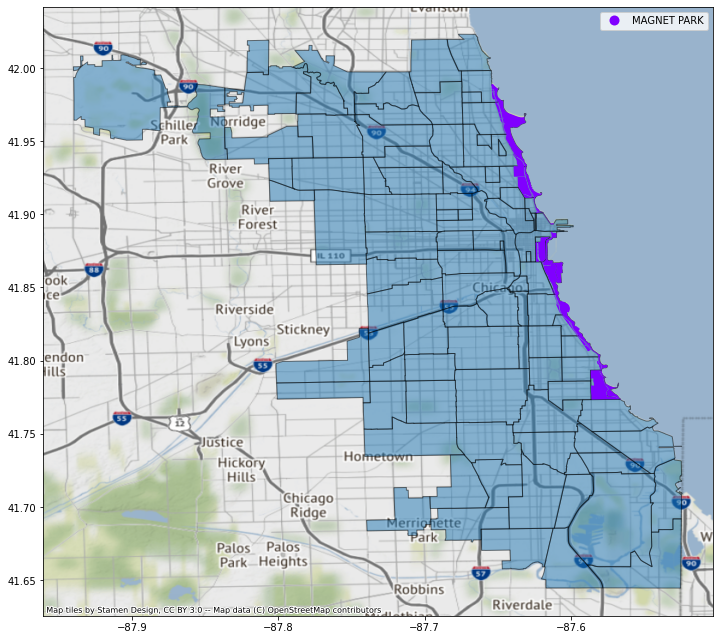

In [146]:
parks_plot('MAGNET PARK')

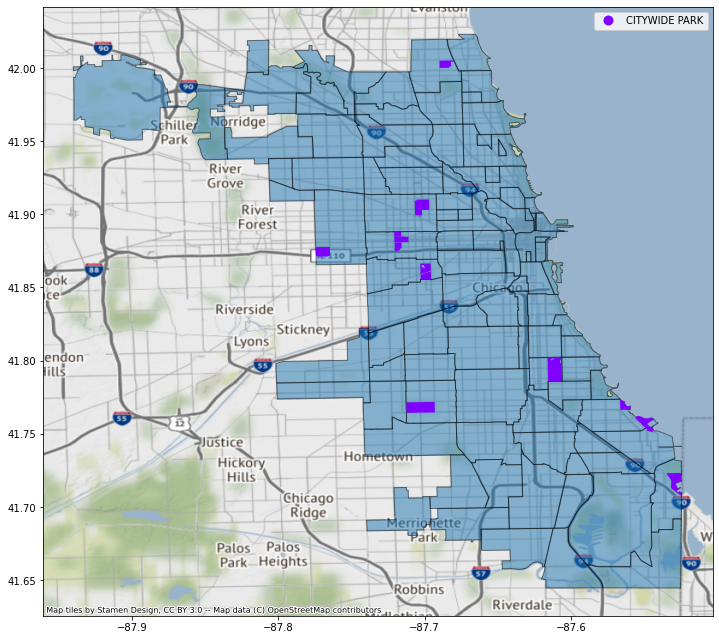

In [147]:
parks_plot('CITYWIDE PARK')

# Finally making a dashboard which is interactive and can choose from the list of park type 

In [151]:
@ipywidgets.interact(p_type=chicago_parks['park_class'].unique())
def parks_plot(p_type):
 
    chicago_parks_subs = chicago_parks.loc[chicago_parks['park_class'] == p_type]
    fig, ax = plt.subplots(figsize=(12,12))

    chicago_boundaries.plot(ax=ax, alpha = 0.5, edgecolor = 'black')
    chicago_parks_subs.plot(column='park_class',ax=ax, cmap='rainbow', categorical=True, legend=True)
    ctx.add_basemap(ax=ax,crs=chicago_boundaries.crs)

    plt.show()
   

interactive(children=(Dropdown(description='p_type', options=('COMMUNITY PARK', 'REGIONAL PARK', 'CITYWIDE PAR…

# Changing the color of each park type for differentiation

In [149]:
colors = {'COMMUNITY PARK':'red', 'REGIONAL PARK':'black', 'CITYWIDE PARK':'green',
       'UNIMPROVED PARK':'blue', 'MAGNET PARK':'pink', 'PASSIVE PARK':'magenta',
       'MINI-PARK':'purple', 'NEIGHBORHOOD PARK':'brown',
       'PARKWAY PARK':'orange', 'LINEAR PARK':'green',
       'NATURE PRESERVE PARK':'violet', 'PARKWAYS PARK':'yellow'}



In [150]:
@ipywidgets.interact(p_type=chicago_parks['park_class'].unique())
def parks_plot(p_type):
 
    chicago_parks_subs = chicago_parks.loc[chicago_parks['park_class'] == p_type]
    fig, ax = plt.subplots(figsize=(12,12))

    chicago_boundaries.plot(ax=ax, alpha = 0.5, edgecolor = 'black')
    chicago_parks_subs.plot(column='park_class',ax=ax, color=colors[p_type], categorical=True, legend=True)
    ctx.add_basemap(ax=ax,crs=chicago_boundaries.crs)

    plt.show()

interactive(children=(Dropdown(description='p_type', options=('COMMUNITY PARK', 'REGIONAL PARK', 'CITYWIDE PAR…

# About the Dashboard 

The dashboard can be used for the following:

1. It can be used by the neighborhood to locate a closest park to them.
2. By the neighbourhood to find a poarticular feature or facility they are looking for like a community park or a regional park.
3. This Dashboard can be used to compare with the visuals made above if any park has facilities such as a zoo or a wheelchair access and a decision can be made which park to go for.
4. Since Chicago is not a very safe city, the dashboard can be used by people to dettermind which park will be more safe depending on the neighbourhood near them.

This dashboard can also be layed using other geoJSON file in the city of Chicago website, like bike racks map so when someone is planning to visit a park and does not have a vehicle they can use the rentef bikes and the bike racks can be found using the dataset layed with our parks. The dataset can be found at: https://data.cityofchicago.org/Transportation/Bike-Racks-Map/4ywc-hr3a